# Regresión Logística - Teoría y Práctica en Python

Este cuaderno de Jupyter cubre la teoría fundamental de la Regresión Logística y demuestra su implementación práctica utilizando la librería `scikit-learn` en Python.

In [1]:
Hola

NameError: name 'Hola' is not defined

## 1. Importar Librerías Necesarias

Comenzamos importando todas las librerías que necesitaremos para generar datos, construir el modelo, entrenarlo y evaluarlo.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.datasets import make_classification # Para generar datos de ejemplo
import seaborn as sns # Para visualizaciones mejoradas (opcional)

--- 
## 2. Generación de Datos de Ejemplo (Simulación)

Para ilustrar la implementación, generaremos un conjunto de datos sintético para un problema de clasificación binaria. Esto nos permite tener un control total sobre las características de los datos.

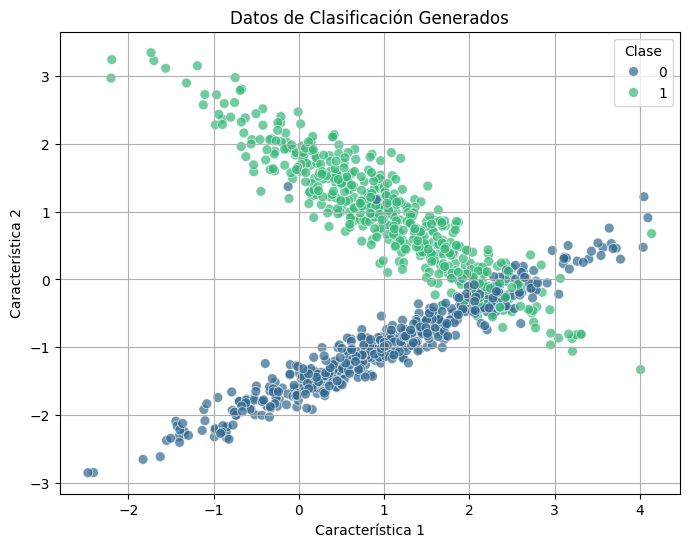

In [7]:
# Generar datos de ejemplo
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, random_state=42)

# X son las características (variables independientes)
# y son las etiquetas (variable dependiente, 0 o 1)

# Visualizar los datos (opcional, para entender el problema)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='viridis', s=50, alpha=0.7)
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Datos de Clasificación Generados')
plt.legend(title='Clase')
plt.grid(True)
plt.show()

In [9]:
#Tenemos las variables independientes y para visualizarlas mejor las podemos ver en un dataframe
df = pd.DataFrame(X, columns=['Característica 1', 'Característica 2'])
# Agregamos la variable dependiente 'y' al dataframe para visualizarla junto con las características
df['Clase'] = y
df.head()

,Característica 1,Característica 2,Clase
0,0.601034,1.535353,1
1,0.755945,-1.172352,0
2,1.354479,-0.948528,0
3,3.103090,0.233485,0
4,0.753178,0.787514,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Característica 1  1000 non-null   float64
 1   Característica 2  1000 non-null   float64
 2   Clase             1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [11]:
df.describe()

,Característica 1,Característica 2,Clase
count,1000.000000,1000.000000,1000.000000
mean,1.025840,-0.012693,0.499000
std,1.071457,1.225378,0.500249
min,-2.472718,-2.850971,0.000000
25%,0.307209,-0.984268,0.000000
50%,1.023750,-0.102945,0.000000
75%,1.724713,0.973550,1.000000
max,4.138715,3.342864,1.000000


--- 
## 3. Dividir el Conjunto de Datos

Es crucial dividir los datos en conjuntos de entrenamiento y prueba. El conjunto de entrenamiento se usa para que el modelo "aprenda" los patrones, y el conjunto de prueba se usa para evaluar su rendimiento en datos que nunca ha visto, dando una estimación más realista de cómo se desempeñará en el mundo real.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras")

--- 
## 4. Crear y Entrenar el Modelo de Regresión Logística

Aquí es donde creamos una instancia de la clase `LogisticRegression` de `sklearn` y entrenamos el modelo con nuestros datos de entrenamiento. La función `fit()` es donde el algoritmo de optimización (como el Descenso de Gradiente) se ejecuta para encontrar los mejores pesos y sesgos.

In [ ]:
# Crear una instancia del modelo de Regresión Logística
# Parámetros comunes:
#   - penalty: 'l1', 'l2', 'elasticnet', 'none' (tipo de regularización). 'l2' es la predeterminada.
#   - C: Inverso de la fuerza de regularización (menor C => mayor regularización). Por defecto es 1.0.
#   - solver: Algoritmo a usar en el problema de optimización. 'liblinear' es bueno para datasets pequeños y L1/L2.
#   - random_state: Para reproducibilidad.

model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42)

# Entrenar el modelo con los datos de entrenamiento
# Este paso corresponde a la fase de optimización de la función de costo.
model.fit(X_train, y_train)

print("Modelo de Regresión Logística entrenado exitosamente.\n")
print(f"Coeficientes (pesos): {model.coef_}") # Estos son los w (w1, w2, ...) de la teoría
print(f"Sesgo (intercepción): {model.intercept_}") # Este es el b de la teoría

--- 
## 5. Realizar Predicciones

Una vez que el modelo está entrenado, podemos usarlo para hacer predicciones en el conjunto de prueba. `predict()` nos da las clases directamente (0 o 1), mientras que `predict_proba()` nos da las probabilidades de pertenecer a cada clase, lo cual es útil para análisis más detallados.

In [ ]:
# Predecir las etiquetas de clase (0 o 1)
y_pred = model.predict(X_test)

# Predecir las probabilidades de pertenecer a cada clase
# model.predict_proba() devuelve un array donde cada fila es [prob_clase_0, prob_clase_1]
y_prob = model.predict_proba(X_test)[:, 1] # Nos interesa la probabilidad de la clase 1

print("Predicciones realizadas en el conjunto de prueba.")

--- 
## 6. Evaluar el Rendimiento del Modelo

Para entender qué tan bien se desempeña nuestro modelo, utilizamos varias métricas de evaluación comunes en problemas de clasificación. Estas métricas nos dan una visión completa del rendimiento del clasificador.

In [ ]:
# Precisión (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrecisión (Accuracy): {accuracy:.4f}")

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:")
print(conf_matrix)

# Visualizar Matriz de Confusión (opcional)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicción 0', 'Predicción 1'],
            yticklabels=['Real 0', 'Real 1'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

# Reporte de Clasificación (incluye Precision, Recall, F1-Score para cada clase)
class_report = classification_report(y_test, y_pred)
print("\nReporte de Clasificación:")
print(class_report)

# Curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Clasificador aleatorio')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

--- 
## 7. Visualizar el Límite de Decisión (para 2D)

Para problemas con solo dos características, podemos visualizar el **límite de decisión** que el modelo ha aprendido. Esta es la frontera que el modelo utiliza para separar las dos clases, representando la ecuación $\mathbf{w}^T \mathbf{x} + b = 0$.

In [ ]:
# Solo si tienes 2 características para visualizar el límite de decisión
if X.shape[1] == 2:
    # Crear una malla para graficar el límite de decisión
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predecir la clase para cada punto en la malla
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    
    # Graficar puntos de entrenamiento
    sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette='viridis', 
                    s=50, alpha=0.7, label='Entrenamiento')
    
    # Graficar puntos de prueba
    # Usamos diferentes marcadores para diferenciar los puntos de prueba
    sns.scatterplot(x=X_test[y_test == 0, 0], y=X_test[y_test == 0, 1], marker='X', s=100, color='red', 
                    label='Prueba Clase 0', legend=False)
    sns.scatterplot(x=X_test[y_test == 1, 0], y=X_test[y_test == 1, 1], marker='P', s=100, color='purple', 
                    label='Prueba Clase 1', legend=False)

    plt.xlabel('Característica 1')
    plt.ylabel('Característica 2')
    plt.title('Límite de Decisión de Regresión Logística')
    plt.legend(title='Clase')
    plt.grid(True)
    plt.show()

--- 
## Conclusión

Este cuaderno ha cubierto la teoría y la implementación básica de la Regresión Logística. Hemos visto cómo generar datos, dividir conjuntos de datos, entrenar un modelo con `sklearn`, realizar predicciones y evaluar el rendimiento utilizando métricas clave. La Regresión Logística es un modelo fundamental y potente, ideal para problemas de clasificación binaria y extensible a multiclase con Softmax Regression.